In [3]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
# torch.cuda.device_count()
# torch.cuda.get_device_name(0)
def torch_gpu_test(size,times):
    sumT = 0
    for i in range(0,times):
        a = torch.rand(size,size).cuda()
        b = torch.rand(size,size).cuda()
        start = time.clock()
        c = torch.mm(a, b)
        end = time.clock()
        if i == 0:
            continue
        #print((end-start)*1000)
        sumT += end-start
    times-=1
    avgT = ((sumT/times)*1000)
    print("torch gpu avg time %f"%avgT)
    return avgT

In [4]:
def numpy_test(shape,times):
    sumT = 0
    for i in range(0,times):
        arr_cpu=np.random.rand(shape,shape)
        start = time.clock()
        np.einsum('ij, jk',arr_cpu,arr_cpu)
        end = time.clock()
        if i == 0:
            continue
        sumT += (end-start)
        #print((end-start)*1000)
    times-=1
    avgT = ((sumT/times)*1000)
    print("cupy avg time %f"%avgT)
    return avgT

In [5]:
def cupy_test(shape,times):
    sumT = 0
    for i in range(0,times):
        arr_gpu=cp.random.rand(shape,shape,dtype=cp.float)
        start = time.clock()
        cp.einsum('ij, jk',arr_gpu,arr_gpu)
        end = time.clock()
        if i == 0:
            continue
        sumT += (end-start)
        #print((end-start)*1000)
    times-=1
    avgT = ((sumT/times)*1000)
    print("cupy avg time %f"%avgT)
    return avgT

In [10]:
def draw_time(timeDict):
    sizeList = timeDict['size']
    plt.plot(sizeList,timeDict['cupy'],marker='o',label='cupy')
    plt.plot(sizeList,timeDict['pytorch-gpu'],marker='o',label='pytorch-gpu')
    plt.plot(sizeList,timeDict['numpy'],marker='o',label='numpy')
    plt.xlabel('matrix size') 
    plt.ylabel('cal time (ms)')
    plt.legend()
    plt.show()

In [7]:
def statistics_time():
    times = 2
    timeDict = {}
    timeDict['cupy'] = []
    timeDict['pytorch-gpu'] = []
    timeDict['numpy'] = [] 
    timeDict['size'] = []
    for n in range(0,13):
        size = 2**n
        print(size)
        cT = cupy_test(size,times)
        tT = torch_gpu_test(size,times)
        nT = numpy_test(size,times)
        timeDict['cupy'] .append(cT)
        timeDict['pytorch-gpu'].append(tT)
        timeDict['numpy'].append(nT)
        timeDict['size'].append(size)
    return timeDict

In [8]:
torch.cuda.set_device(0)  
timeDict = statistics_time()

1


C:\Users\Vodka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\Vodka\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


cupy avg time 0.182300


C:\Users\Vodka\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\Vodka\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


torch gpu avg time 0.681300
cupy avg time 0.139800
2
cupy avg time 0.208700
torch gpu avg time 0.337700
cupy avg time 0.017800
4
cupy avg time 0.631400
torch gpu avg time 0.160600
cupy avg time 0.013900
8
cupy avg time 0.370600
torch gpu avg time 0.128100
cupy avg time 0.013800
16
cupy avg time 1.407100
torch gpu avg time 0.142800
cupy avg time 0.022900
32
cupy avg time 0.314600
torch gpu avg time 0.120500
cupy avg time 0.395100
64
cupy avg time 0.441800
torch gpu avg time 0.188000
cupy avg time 0.214300
128
cupy avg time 0.425700
torch gpu avg time 0.104000
cupy avg time 1.386300
256
cupy avg time 0.730600
torch gpu avg time 0.572800
cupy avg time 14.490000
512
cupy avg time 0.625800
torch gpu avg time 0.116400
cupy avg time 62.774100
1024
cupy avg time 0.214200
torch gpu avg time 0.077000
cupy avg time 815.659800
2048
cupy avg time 0.239600
torch gpu avg time 0.103100
cupy avg time 6112.161800
4096
cupy avg time 1.365700
torch gpu avg time 0.128000
cupy avg time 53179.451900


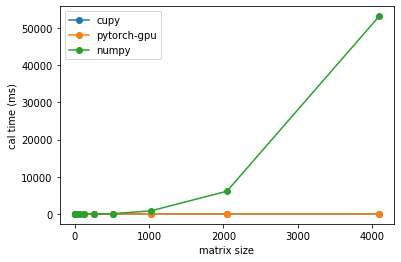

In [11]:
draw_time(timeDict)